# House Rent EDA and Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
import seaborn as sns
%matplotlib inline

In [27]:
#dataset
df = pd.read_csv('dataset/House_Rent_Dataset.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


### EDA

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [29]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

Therefore our dataset has no null values!

<AxesSubplot:>

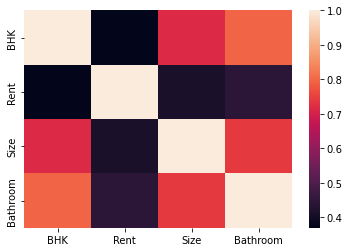

In [30]:
sns.heatmap(df.corr())

In [31]:
#floor
df["House_floor"]=df["Floor"].str.split(" ").str[0]
df["Total_floors"]=df["Floor"].str.split(" ").str[-1]

In [32]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,House_floor,Total_floors
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,Ground,2
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2


House_floor columns has "Ground", which has to be changed to 0

In [33]:
df[df["House_floor"]=="Ground"]

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,House_floor,Total_floors
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,Ground,2
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,Ground,1
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent,Ground,4
14,2022-05-05,3,8500,900,Ground out of 2,Carpet Area,Paschim Barisha,Kolkata,Unfurnished,Bachelors,2,Contact Owner,Ground,2
17,2022-06-20,2,10000,800,Ground out of 2,Super Area,Behala,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,Ground,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4721,2022-05-12,1,5500,40,Ground out of 2,Super Area,Jagadgiri Gutta,Hyderabad,Unfurnished,Bachelors/Family,1,Contact Owner,Ground,2
4722,2022-06-10,1,8000,850,Ground out of 3,Super Area,Hyderguda,Hyderabad,Unfurnished,Bachelors/Family,1,Contact Owner,Ground,3
4729,2022-05-29,2,13000,1500,Ground out of 1,Carpet Area,"Saket, Secunderabad",Hyderabad,Unfurnished,Family,2,Contact Owner,Ground,1
4732,2022-07-08,2,7000,900,Ground out of 2,Super Area,Vinayaka Nagar,Hyderabad,Unfurnished,Bachelors/Family,1,Contact Owner,Ground,2


In [34]:
df.loc[df["House_floor"]=="Ground","House_floor"]=0

In [35]:
df["House_floor"].unique()

array([0, '1', '2', '4', '3', '5', '7', '8', 'Upper', '11', 'Lower', '6',
       '14', '43', '13', '18', '17', '9', '19', '60', '34', '12', '26',
       '25', '53', '16', '10', '39', '32', '47', '28', '20', '15', '65',
       '40', '37', '22', '21', '30', '35', '33', '44', '41', '46', '27',
       '45', '48', '50', '24', '23', '29', '49', '36', '76'], dtype=object)

Upper and lower will be changed to -1 and -2. Both are in basement

In [36]:
df["House_floor"] = df["House_floor"].replace(["Upper"],-1)
df["House_floor"] = df["House_floor"].replace(["Lower"],-1)
df["House_floor"]

0        0
1        1
2        1
3        1
4        1
        ..
4741     3
4742     1
4743     3
4744    23
4745     4
Name: House_floor, Length: 4746, dtype: object

In [37]:
df["House_floor"] = df["House_floor"].astype(int)

In [38]:
df["Total_floors"].unique()

array(['2', '3', '1', '4', '5', '14', '8', '6', '19', '10', '7', '13',
       '78', '18', '12', '24', '31', '21', '23', '20', '9', '22', '58',
       '16', '66', '48', '40', '44', '42', '41', '60', '32', '30', '29',
       '89', '15', '11', '28', '17', '45', '35', '75', '38', '51', '43',
       '25', '27', '26', '76', '36', '37', '55', '68', '77', '50', '59',
       '62', '39', '52', '54', '33', '46', '85', '71', '81', '34',
       'Ground'], dtype=object)

We will have to change 'Ground' to 1

In [39]:
df["Total_floors"] = df["Total_floors"].replace(["Ground"],1)
df["Total_floors"] = df["Total_floors"].astype(int)

In [40]:
del df["Floor"]

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Area Type          4746 non-null   object
 5   Area Locality      4746 non-null   object
 6   City               4746 non-null   object
 7   Furnishing Status  4746 non-null   object
 8   Tenant Preferred   4746 non-null   object
 9   Bathroom           4746 non-null   int64 
 10  Point of Contact   4746 non-null   object
 11  House_floor        4746 non-null   int32 
 12  Total_floors       4746 non-null   int32 
dtypes: int32(2), int64(4), object(7)
memory usage: 445.1+ KB


In [42]:
df["Area Type"].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

In [43]:
df["City"].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

### Rent in various cities

<AxesSubplot:xlabel='City'>

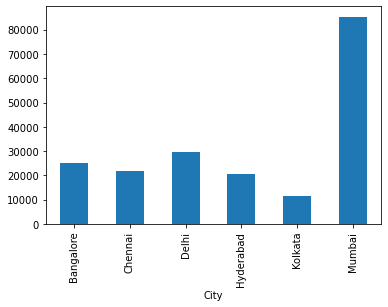

In [44]:
df.groupby('City')['Rent'].mean().plot(kind='bar') #mean value

Highest rent is in Mumbai, followed by Delhi and Bangalore

In [45]:
df["Furnishing Status"].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

### Rent based on Furnishing Status

<AxesSubplot:xlabel='Furnishing Status'>

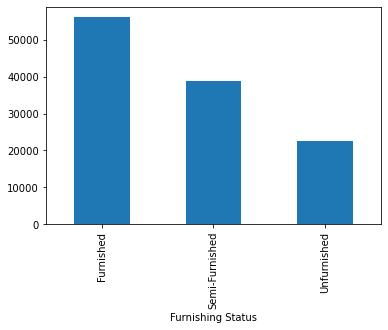

In [46]:
df.groupby('Furnishing Status')['Rent'].mean().plot(kind='bar')

In [47]:
df["Tenant Preferred"].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

In [56]:
df["Point of Contact"].value_counts()

Contact Owner      3216
Contact Agent      1529
Contact Builder       1
Name: Point of Contact, dtype: int64

In [57]:
df

0       1100
1        800
2       1000
3        800
4        850
        ... 
4741    1000
4742    2000
4743    1750
4744    1500
4745    1000
Name: Size, Length: 4746, dtype: int64